In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
# Apply a multi class classification of the samples
# regarding an optimized theta
def ClassifyMultiClass(theta,X,th):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	y[y >= th] = 1
	y[y < th] = 0
	X = np.delete(X,0,axis=1)
	return y

# Apply the binary classification of the samples
# regarding an optimized theta
def Classify(theta,X,th):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	y[y >= th] = 1
	y[y < th] = 0
	X = np.delete(X,0,axis=1)
	return y

# This function is used if the theta already
# has the first column referenced to Theta0
def ClassifyWithFullTheta(theta,X,th):
	y = Hypothesis(theta,X)
	y[y >= th] = 1
	y[y < th] = 0
	return y

def Predict(theta,X):
	X = np.insert(X,0,1,axis=1)
	y = Hypothesis(theta,X)
	X = np.delete(X,0,axis=1)
	return y

# Since we are dealing with logistic regression,
# the hypothesis is defined as
def Hypothesis(theta,X):
	h = 1 / (1 + np.exp(-np.dot(X,theta)))
	return h

In [7]:
#-----------------------------------
#   Evaluation Metrics and Loss Functions
#-----------------------------------

def CrossEntropyLoss(h,y):
	return np.multiply(np.log(h),y) + np.multiply((1-np.log(h)),(1-y))

def Cost(theta,X,y):
	h = Hypothesis(theta,X)
	cost = CrossEntropyLoss(h,y)
	mean_cost = cost.sum()/-y.shape[0]
	return mean_cost

def AccuracyScore(predY,Y):
	TP = ((predY == Y) & (predY == 1.)).sum()
	TN = ((predY == Y) & (predY == 0.)).sum()	
	acc = (TP + TN) / predY.shape[0]
	return acc

def PrecisionScore(predY,Y):
	TP = ((predY == Y) & (predY == 1)).sum()
	FP = ((predY != Y) & (predY == 1)).sum()
	precision = TP / (TP + FP)
	return precision

def RecallScore(predY, Y):
	TP = ((predY == Y) & (predY == 1)).sum()
	FN = ((predY != Y) & (predY == 0)).sum()
	recall = TP / (TP + FN)
	return recall

def FbScore(predY, Y, beta):
	precision = PrecisionScore(predY,Y)
	recall = RecallScore(predY,Y)
	fscore = (1 + beta*beta)*((precision*recall)/((beta*beta*precision)+recall))
	return fscore

In [4]:
#-----------------------------------
#   Gradient Descent
#-----------------------------------

def BGD(X,y,alpha,iterations):

	X = np.insert(X,0,1,axis=1)

	nsamples = X.shape[0]
	nfeatures = X.shape[1]
	theta = np.zeros(nfeatures)
	J=[]	

	for i in range(iterations):

		h = Hypothesis(theta,X)

		error = h - y

		grad = np.dot(X.transpose(),error)/nsamples

		theta = theta - alpha*grad

		J.append(Cost(theta,X,y))		

	X = np.delete(X,0,axis=1)

	plt.plot(J)
	plt.ylabel('Error')
	plt.xlabel('iterations')
	plt.show()

	return theta,J[iterations-1]

--- X
[[1 1 1 1]
 [0 0 0 0]
 [4 4 4 4]
 [5 5 5 5]
 [7 7 7 7]
 [9 9 9 9]]
--- Theta
[2 2 2 2]
--- y
[0. 0. 0. 1. 1. 1.]
--- Hypothesis
[0.99966465 0.5        1.         1.         1.         1.        ]
--- Cost
-0.6155804311554757


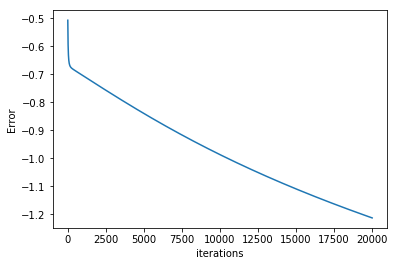

--- Theta
[-2.27433027  0.15867713  0.15867713  0.15867713  0.15867713]
--- Error
-1.2129286981240235
--- Hypothesis
[0.99105312 0.26797652 0.40849155 0.98325477]
--- Classification
[1. 0. 0. 1.]
--- Expected Output
[1. 0. 0. 1.]


In [9]:
#-----------------------------------
#   Logistic Regression - Toy Example
#-----------------------------------

X = np.array([[1,1,1,1],[0,0,0,0],[4,4,4,4],[5,5,5,5],[7,7,7,7],[9,9,9,9]])
y = np.array([0.,0.,0.,1.,1.,1.])
theta = np.array([2,2,2,2])

X_val = np.array([[11,11,11,11],[2,2,2,2],[3,3,3,3],[10,10,10,10]])
y_val = np.array([1.,0.,0.,1.])

print("--- X")
print(X)
print("--- Theta")
print(theta)
print("--- y")
print(y)

h = Hypothesis(theta,X)
print("--- Hypothesis")
print(h)

cost = Cost(theta,X,y)
print("--- Cost")
print(cost)

theta,error = BGD(X,y,0.001,20000)
print("--- Theta")
print(theta)
print("--- Error")
print(error)

h = Predict(theta,X_val)
print("--- Hypothesis")
print(h)
resp = Classify(theta,X_val,0.7)
print("--- Classification")
print(resp)
print("--- Expected Output")
print(y_val)